# 1. Liraries used 

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report



# 2. Data Exploratory Analyis (EDA)

In [25]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Age Distribution')

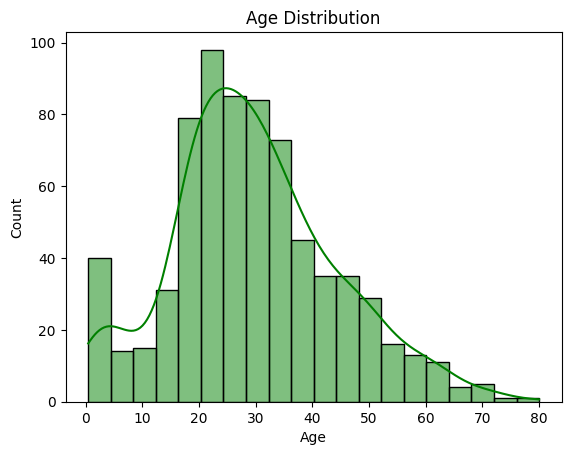

In [27]:
sns.histplot(data['Age'],kde=True,color='green')
plt.title('Age Distribution')


Text(0.5, 1.0, 'Survived VS not Survived')

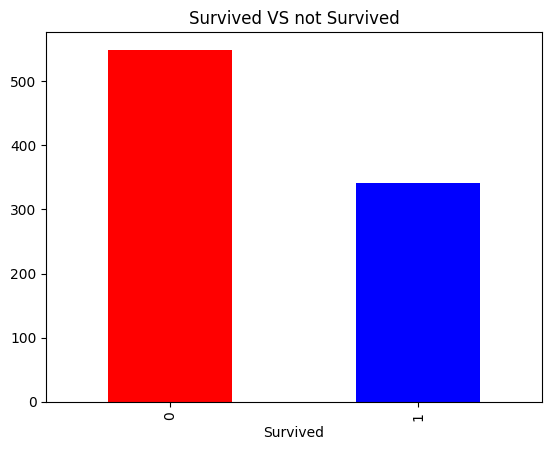

In [28]:
data['Survived'].value_counts().plot(kind='bar',color=['red','blue'])
plt.title('Survived VS not Survived')

Text(0.5, 1.0, 'Male vs female Distribution')

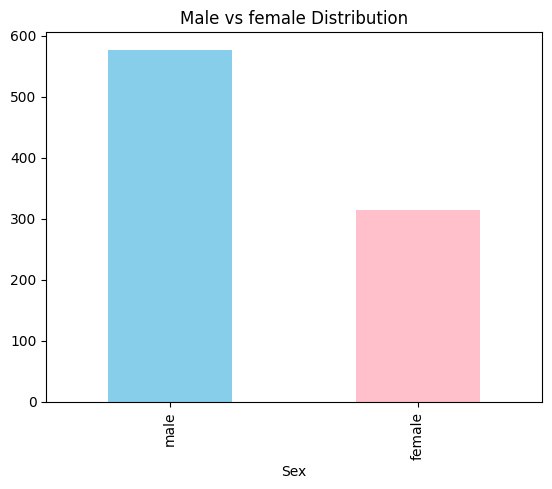

In [29]:
data['Sex'].value_counts().plot(kind='bar',color=['skyblue','pink'])
plt.title('Male vs female Distribution')

Text(0.5, 1.0, 'Target by Gender')

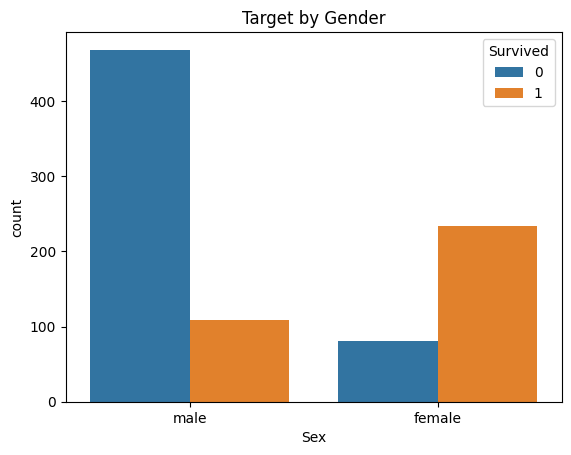

In [30]:
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title('Target by Gender')

Text(0.5, 1.0, 'Port of Embarkation')

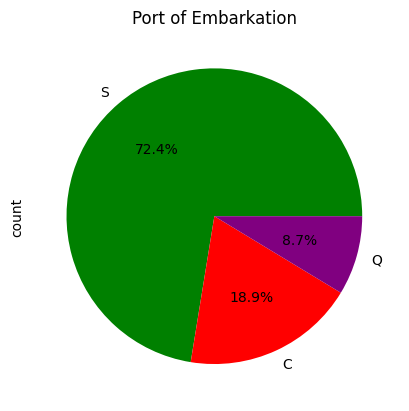

In [31]:
data['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['green','red','purple'])
plt.title('Port of Embarkation')

Text(0.5, 1.0, 'Fare vs Survived')

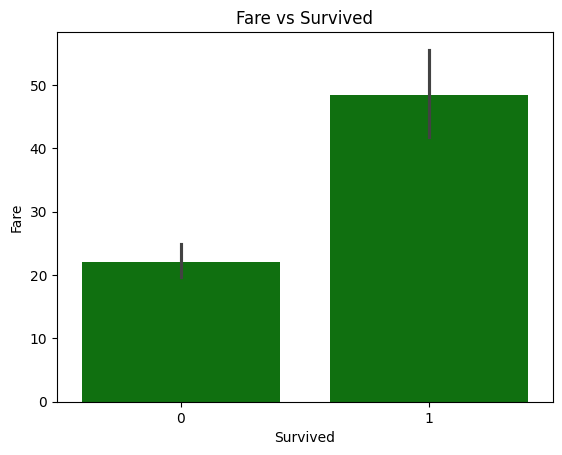

In [32]:
sns.barplot(x='Survived',y='Fare',data=data,color='green')
plt.title('Fare vs Survived')

# 3. Feature Engineering

In [33]:
X=data.drop(columns=['PassengerId','Name','Ticket','Survived','Cabin'],axis=1)
y=data['Survived']

X.info()
y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


(891,)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



print(X_train.shape, X_test.shape)  
print(y_train.shape, y_test.shape)

(712, 7) (179, 7)
(712,) (179,)


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [36]:
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])
X['Age'] = X['Age'].fillna(X['Age'].median())

In [37]:
X['Embarked'].isna().sum()
X['Age'].isna().sum()

np.int64(0)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [39]:
numeric_features=['Age','SibSp','Parch','Fare']
categorical_features=['Pclass','Sex','Embarked']

numeric_transformer=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()) ])

categorical_transformer=Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')) ])

preprocessor = ColumnTransformer([
    ('num',numeric_transformer,numeric_features),
    ('cat',categorical_transformer,categorical_features)  ])

# 4. Model Building

In [40]:
randomseed=42
models = {
    'LogisticRegression':LogisticRegression(),
    'RandomForest':RandomForestClassifier(),
    'xgboost':XGBClassifier()
}
results_dictionary={}
for model_name , model in models.items():
    pipe = Pipeline(steps=[('prep', preprocessor), ('model', model)])   
    pipe.fit(X_train,y_train)
    results_dictionary[model_name] = pipe.score(X_test,y_test)
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_precision = np.mean(cross_val_score(pipe,X_train,y_train,scoring="precision",cv=5))
print(f'The Scores are {scores}')
results_dictionary

The Scores are [0.7972028  0.77622378 0.82394366 0.79577465 0.8028169 ]


{'LogisticRegression': 0.7988826815642458,
 'RandomForest': 0.8212290502793296,
 'xgboost': 0.8156424581005587}

In [41]:
y_pred=pipe.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

<Axes: >

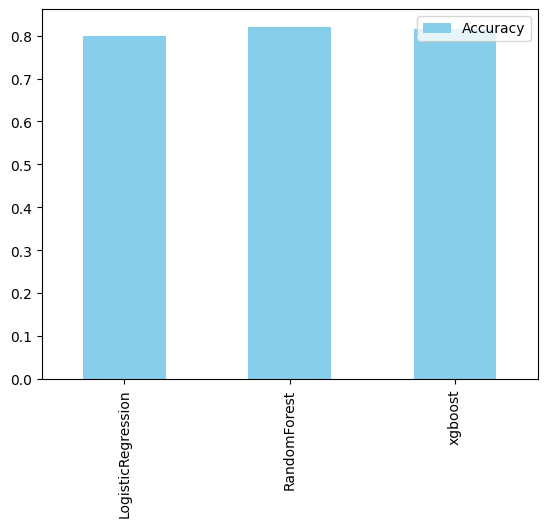

In [42]:
results=pd.DataFrame(results_dictionary.values(),results_dictionary.keys(),columns=['Accuracy'])
results.plot(kind='bar',color=['skyblue'])

# 5. Model Evaluation

In [43]:
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}') 
print(f'Precision Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print(f'Classification Report:{classification_report(y_test,y_pred)}')

Accuracy Score:0.8156424581005587
Precision Score:0.7733333333333333
Recall Score:0.7837837837837838
Confusion Matrix:[[88 17]
 [16 58]]
Classification Report:              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

